# Ejercicio Práctica 9: más sobre Máquinas de Vector Soporte 

En este ejercicio insistiremos un poco más en los problemas de clasificación con máquinas de vector soporte (SVM).

El código que sigue implementa un problema de clasificación con SVM donde se incluyen gráficas para los márgenes y los vectores soporte. Además, la implementación no se hace con [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html) sino con [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) .



C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\3432396308.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\3432396308.py:46: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\3432396308.py:56: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.get_cmap("RdBu"), edgecolors="k"
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\3432396308.py:53: MatplotlibDeprecationWarning: The get_cmap function was deprecated

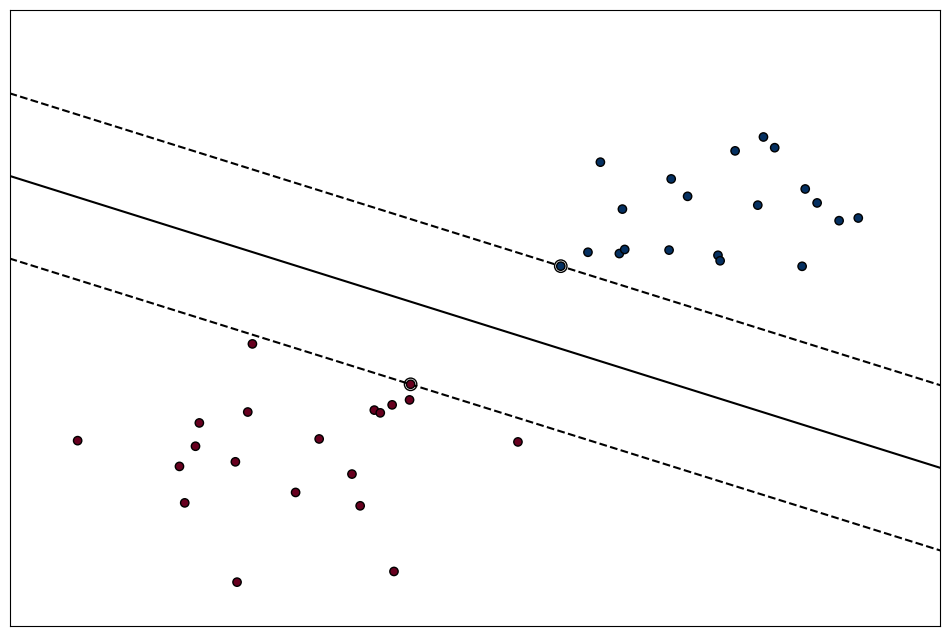

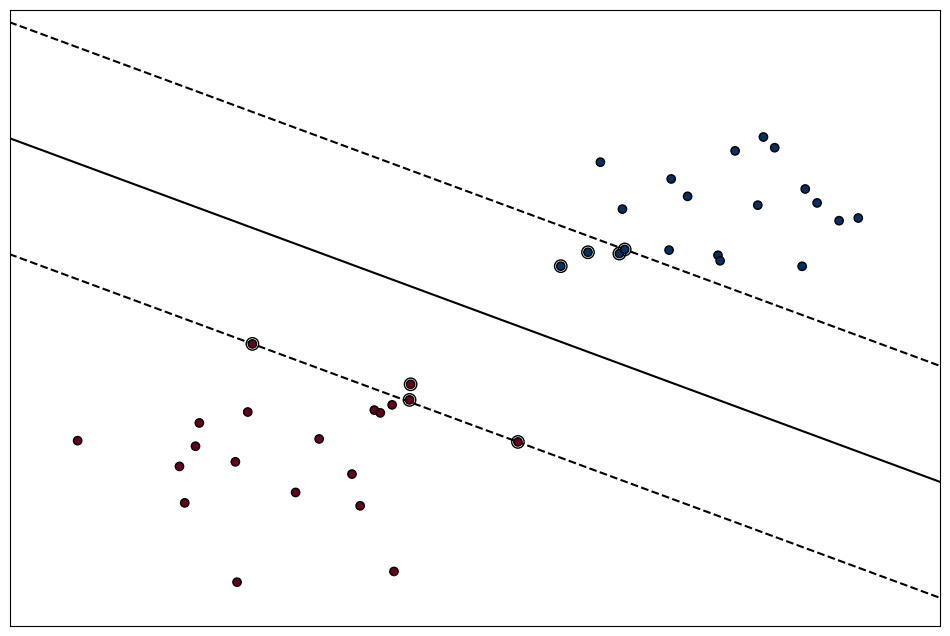

In [5]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import svm


# we create 40 separable points
#np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [0] * 20 + [1] * 20

# figure number
fignum = 1

# fit the model
for name, penalty in (("unreg", 1), ("reg", 0.05)):

    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(-5, 5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # plot the parallels to the separating hyperplane that pass through the
    # support vectors (margin away from hyperplane in direction
    # perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
    # 2-d.
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(12, 8))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.cm.get_cmap("RdBu"),
    )
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.axis("tight")
    x_min = -4.8
    x_max = 4.2
    y_min = -6
    y_max = 6

    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
    #plt.contourf(XX, YY, Z, cmap=plt.cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1

plt.show()

En primer lugar, has de entender y explicar lo que hace el código, especialmente las principales diferencias entre la implementación que hicimos en clase y la que aparece aquí (es decir, entre **LinearSVC** y **SVC**). Explica con detalle cómo se calcula el hiperplano de separación, los márgenes y los vectores soporte. 
También has de explicar la formulación matemática que resuelve **SVC** y si lo hace vía el problema primal o el dual. Puedes responder a todo esto adjuntando la explicación en un fichero .pdf   Puedes empezar tu búsqueda de  información [aquí](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html#sphx-glr-auto-examples-svm-plot-svm-margin-py)

A continuación ejecuta el código anterior pero con los datos de la base iris que usamos en la práctica, es decir, los datos X e Y anteriores se han de sustiruir por los que usamos en la práctica de clase. Deberás hacer varios ajustes en el código para hacerlo funcionar bien con estos datos.

iris = datasets.load_iris()

print(list(iris.target_names))

X = iris["data"][:, (2, 3)] # longitud y anchura del pétalo

Y = (iris["target"] == 2).astype(np.float64) # 1 si Iris Virginica, 0 en caso contrario


C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\1533885798.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap=plt.cm.get_cmap("RdBu"),
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\1533885798.py:38: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\1533885798.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.get_cmap("RdBu"), edgecolors="k"
C:\Users\fcoja\AppData\Local\Temp\ipykernel_22072\1533885798.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated

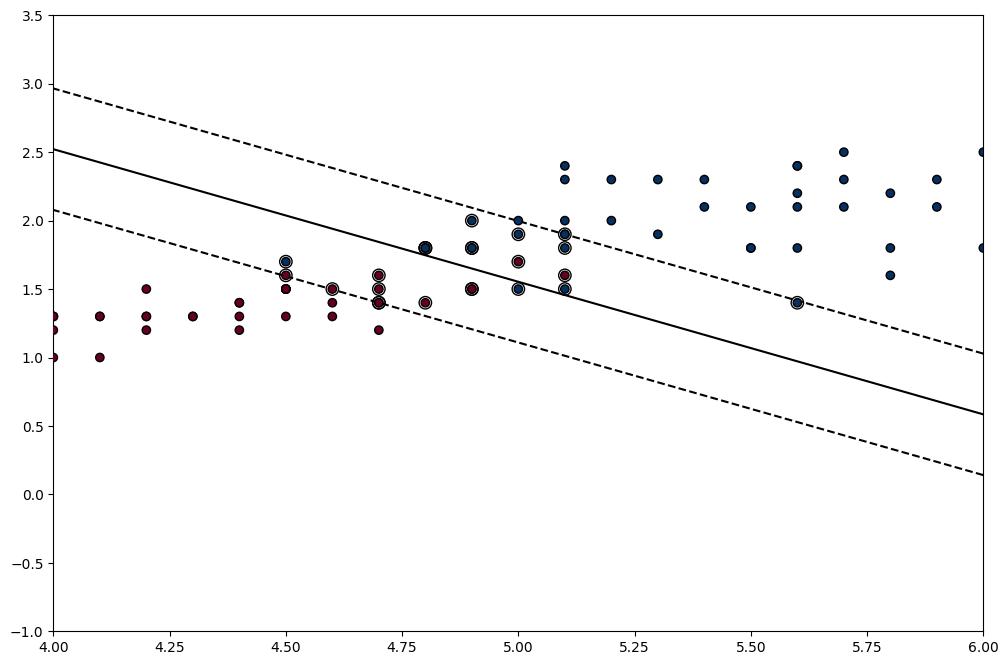

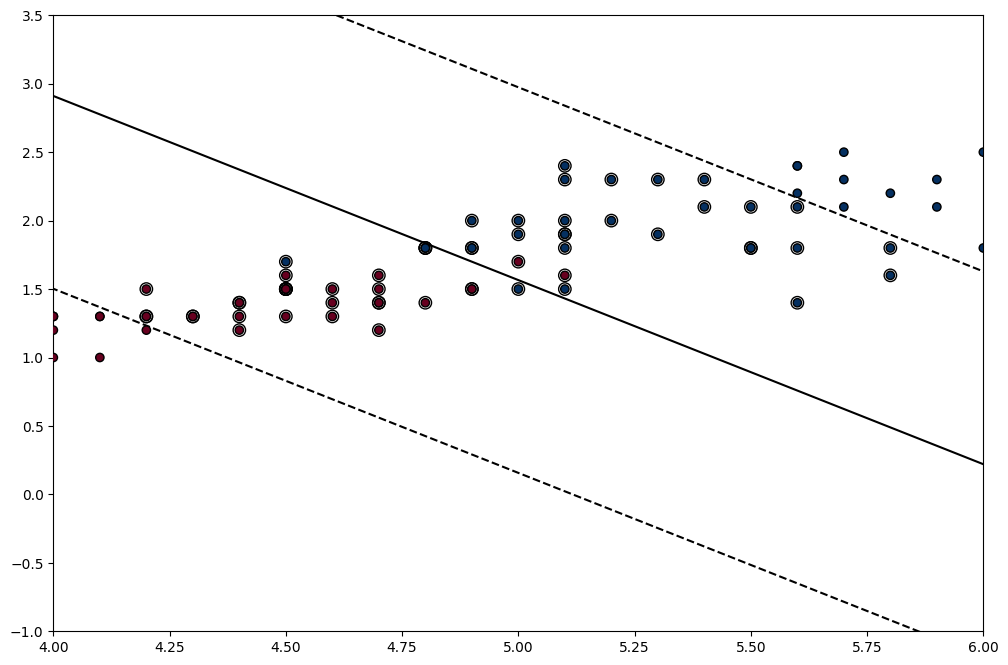

In [6]:
# Completar aquí
from sklearn import datasets

# Cargar los datos de iris
iris = datasets.load_iris()

# Seleccionar longitud y anchura del pétalo
X = iris['data'][:, (2, 3)]
Y = (iris['target'] == 2).astype(np.float64)

# Número de figura
fignum = 1

# Ajustar y graficar el modelo
for name, penalty in (("unreg", 1), ("reg", 0.05)):
    clf = svm.SVC(kernel="linear", C=penalty)
    clf.fit(X, Y)

    # Obtener el hiperplano separador
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5)
    yy = a * xx - (clf.intercept_[0]) / w[1]

    # Calcular los márgenes
    margin = 1 / np.sqrt(np.sum(clf.coef_**2))
    yy_down = yy - np.sqrt(1 + a**2) * margin
    yy_up = yy + np.sqrt(1 + a**2) * margin

    # Graficar
    plt.figure(fignum, figsize=(12, 8))
    plt.clf()
    plt.plot(xx, yy, "k-")
    plt.plot(xx, yy_down, "k--")
    plt.plot(xx, yy_up, "k--")

    # Graficar vectores
    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
        cmap=plt.cm.get_cmap("RdBu"),
    )
    # Graficar puntos de datos
    plt.scatter(
        X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.get_cmap("RdBu"), edgecolors="k"
    )

    plt.xlim(4, 6)
    plt.ylim(-1, 3.5)
    fignum += 1

plt.show()
# --------------------
